<a href="https://colab.research.google.com/github/sur4ds/statistics_ML_jan_2020/blob/master/Logistics_regression_Modified_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import math

In [152]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/titanic_data.csv")

In [153]:
titanic_df.shape

(891, 12)

In [154]:
891*.3

267.3

In [155]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [157]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [158]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
#Check if there are any NA values in all the columns
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [160]:
titanic_df[titanic_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [161]:
# Since we have na values in Age, ---> replace them with mean. Also for clarity check what is the median of Age column
print("median values " ,titanic_df.median())

print("mean values " ,titanic_df.median())

median values  PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64
mean values  PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


In [162]:
titanic_df["Age"].median()

28.0

In [163]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(),inplace=True)

In [164]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
titanic_df["Age"].isna().sum()

0

In [166]:
titanic_df[titanic_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [167]:
titanic_df.isna().sum()/titanic_df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [168]:
#drop the cabin column as there are 77% Null values

titanic_df.drop("Cabin",axis=1,inplace=True)

In [169]:
mode_Embarked = titanic_df["Embarked"].mode()

In [170]:
type(mode_Embarked)

pandas.core.series.Series

In [171]:
mode_Embarked[0]

'S'

In [172]:
#replace the Mode column with Mode of Embarked 
titanic_df['Embarked'].fillna(mode_Embarked[0],inplace=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [173]:
#Cross check if Embarked column has been replaced 

titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [174]:
#Uni Variate analysis 
# Plot the count plots ffor the Survived column with respect to others

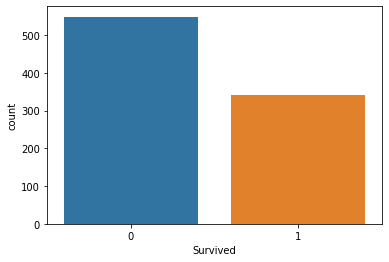

In [175]:
sns.countplot("Survived",data=titanic_df)

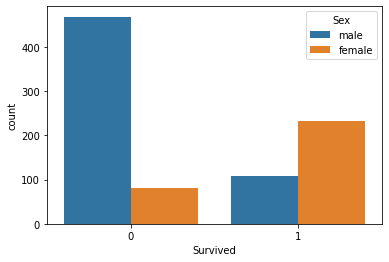

In [176]:
sns.countplot("Survived",hue='Sex',data=titanic_df)

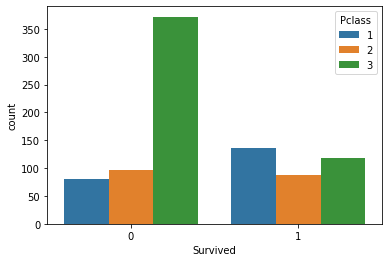

In [177]:
# Survived for each Pclass
sns.countplot("Survived",hue='Pclass',data=titanic_df)

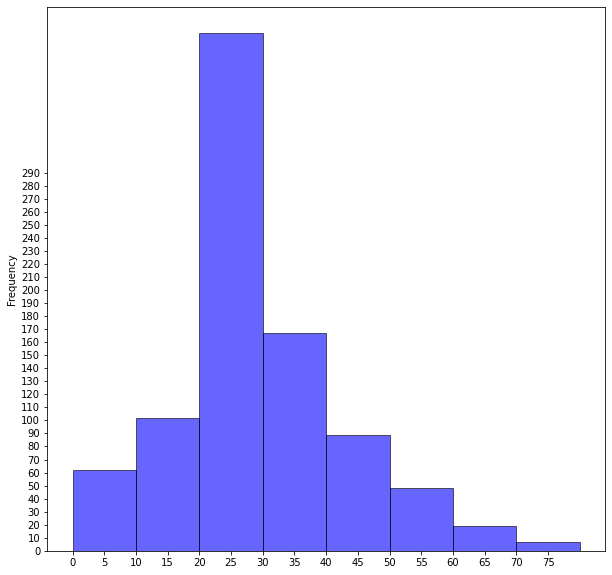

In [178]:

from matplotlib import pyplot as plt
plt.xticks(range(0,80,5))
plt.yticks(range(0,300,10))
titanic_df["Age"].plot.hist(bins=[0,10,20,30,40,50,60,70,80], 
                                 figsize=(10,10), alpha=0.6, facecolor="blue", edgecolor="black")

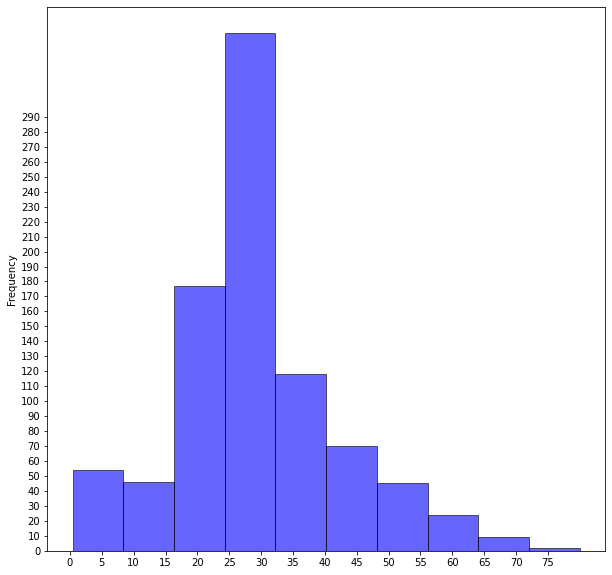

In [179]:
from matplotlib import pyplot as plt
plt.xticks(range(0,80,5))
plt.yticks(range(0,300,10))
titanic_df["Age"].plot.hist(
                                 figsize=(10,10), alpha=0.6, facecolor="blue", edgecolor="black")

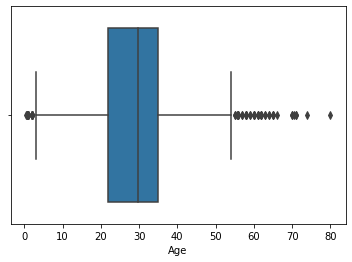

In [180]:
sns.boxplot(titanic_df['Age'])

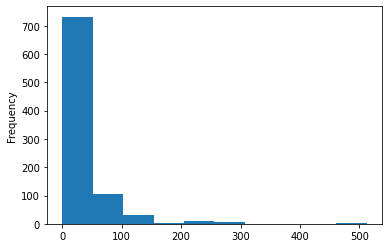

In [181]:
titanic_df['Fare'].plot.hist()
plt.show()

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

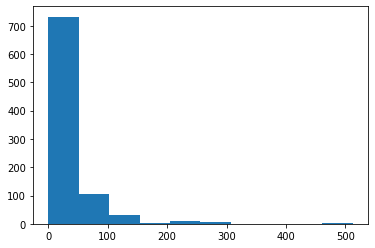

In [182]:
plt.hist(titanic_df['Fare'])

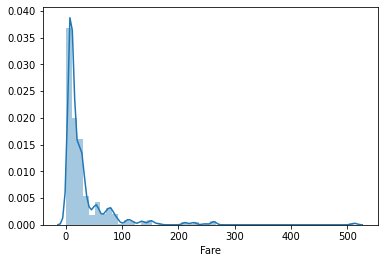

In [183]:
sns.distplot(titanic_df['Fare'])

In [184]:
#start onehot encoding for
# sex,Pclass and Embarked
# using pd.getdimmies function

In [185]:
sex = pd.get_dummies(titanic_df['Sex'],prefix='Sex')
sex

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [186]:
pclass = pd.get_dummies(titanic_df['Pclass'],prefix='pcl')
pclass

,pcl_1,pcl_2,pcl_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [187]:
embark = pd.get_dummies(titanic_df['Embarked'],prefix='emb')
embark

,emb_C,emb_Q,emb_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [188]:
titanic_df = pd.concat([titanic_df,sex,pclass,embark],axis=1)

In [189]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,pcl_1,pcl_2,pcl_3,emb_C,emb_Q,emb_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,0,1,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,1,0,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,1,1,0,0,1,0,0


In [190]:
columns_to_be_dropped = ['PassengerId','Pclass','Name','Sex','Ticket','Parch','Fare','Embarked']

In [191]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Sex_female', 'Sex_male',
       'pcl_1', 'pcl_2', 'pcl_3', 'emb_C', 'emb_Q', 'emb_S'],
      dtype='object')

In [192]:
titanic_df.drop(titanic_df[columns_to_be_dropped],axis=1,inplace=True)

In [193]:
titanic_df

,Survived,Age,SibSp,Sex_female,Sex_male,pcl_1,pcl_2,pcl_3,emb_C,emb_Q,emb_S
0,0,22.000000,1,0,1,0,0,1,0,0,1
1,1,38.000000,1,1,0,1,0,0,1,0,0
2,1,26.000000,0,1,0,0,0,1,0,0,1
3,1,35.000000,1,1,0,1,0,0,0,0,1
4,0,35.000000,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,1,0,1,0,0,0,1
887,1,19.000000,0,1,0,1,0,0,0,0,1
888,0,29.699118,1,1,0,0,0,1,0,0,1
889,1,26.000000,0,0,1,1,0,0,1,0,0


In [213]:
titanic_df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [194]:
X = titanic_df.drop("Survived",axis =1)
y= titanic_df["Survived"]

X.head()

,Age,SibSp,Sex_female,Sex_male,pcl_1,pcl_2,pcl_3,emb_C,emb_Q,emb_S
0,22.0,1,0,1,0,0,1,0,0,1
1,38.0,1,1,0,1,0,0,1,0,0
2,26.0,0,1,0,0,0,1,0,0,1
3,35.0,1,1,0,1,0,0,0,0,1
4,35.0,0,0,1,0,0,1,0,0,1


In [195]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [196]:
#Test Train split

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=111)

In [199]:
X_train.shape

(623, 10)

In [200]:
X_test.shape

(268, 10)

In [201]:
y_test.shape

(268,)

In [202]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
y_pred = model.predict(X_test)



In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       171
           1       0.73      0.69      0.71        97

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [206]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[146,  25],
       [ 30,  67]])

In [210]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7947761194029851

In [214]:
# Another attempt to do standard scalar for Age column

In [225]:
from sklearn.preprocessing import StandardScaler 

X = titanic_df.drop("Survived",axis =1)
y= titanic_df["Survived"]

X.head()

,Age,SibSp,Sex_female,Sex_male,pcl_1,pcl_2,pcl_3,emb_C,emb_Q,emb_S
0,22.0,1,0,1,0,0,1,0,0,1
1,38.0,1,1,0,1,0,0,1,0,0
2,26.0,0,1,0,0,0,1,0,0,1
3,35.0,1,1,0,1,0,0,0,0,1
4,35.0,0,0,1,0,0,1,0,0,1


In [254]:
################################################
########################################
# Not Sure If this way of standardizarion is correct 
# Actually tried to standardize Columnwise . It dd not seem to work .
# need inputs .
scaler = StandardScaler() 
X_std = scaler.fit_transform(X)


ValueError: ignored

In [247]:
from sklearn.model_selection import train_test_split

X_test,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=222)

In [249]:
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [250]:
y_pred = model.predict(X_test)

In [251]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72       163
           1       0.33      0.08      0.12       105

    accuracy                           0.58       268
   macro avg       0.47      0.49      0.42       268
weighted avg       0.50      0.58      0.49       268



In [252]:
accuracy_score(y_test,y_pred)

0.5783582089552238

In [253]:
confusion_matrix(y_test,y_pred)

array([[147,  16],
       [ 97,   8]])